<a href="https://colab.research.google.com/github/DeJezuz/COVID-19-global-data-tracker/blob/main/COVID_19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

In [3]:
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

In [4]:
df = df.dropna(subset=['total_cases', 'total_deaths', 'total_vaccinations'])
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-1995101654.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


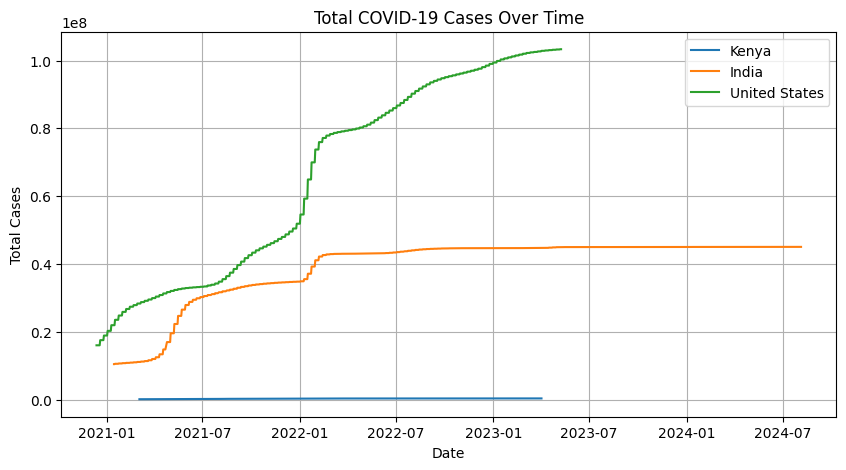

In [5]:
plt.figure(figsize=(10,5))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

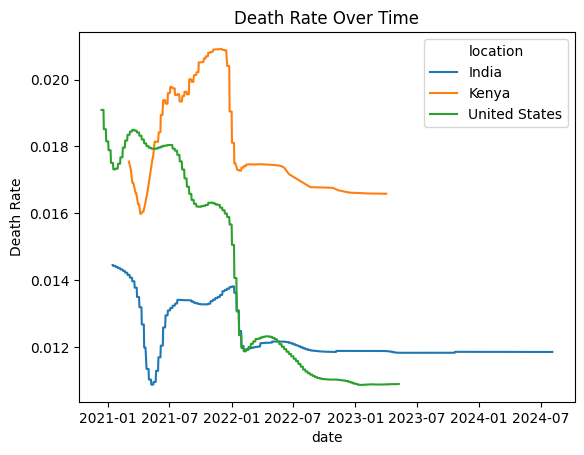

In [6]:
df['death_rate'] = df['total_deaths'] / df['total_cases']
sns.lineplot(x='date', y='death_rate', hue='location', data=df)
plt.title('Death Rate Over Time')
plt.ylabel('Death Rate')
plt.show()

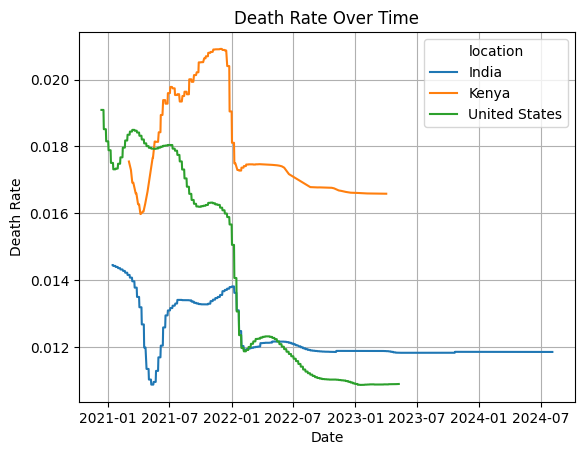

In [10]:
# Calculate death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Plot death rate over time
sns.lineplot(x='date', y='death_rate', hue='location', data=df)
plt.title('Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.grid(True)
plt.show()

In [16]:
import plotly.express as px

# Get the latest data for each country
latest_df = df[df['date'] == df['date'].max()]

# Create the choropleth map
fig = px.choropleth(latest_df,
                    locations='iso_code',
                                        color='total_cases',
                                                            hover_name='location',
                                                                                color_continuous_scale='Reds',
                                                                                                    title='Global COVID-19 Case Density',
                                                                                                    scope='world')

fig.show()

In [18]:
from IPython.display import Markdown

Markdown("""
### 💡 Key Insights

- 🇺🇸 The United States had the highest cumulative case count.
- 🇮🇳 India showed a rapid vaccination rollout starting mid-2021.
- 🇰🇪 Kenya maintained a relatively low death rate despite case surges.
- 📉 Vaccination rates tended to rise after spikes in cases.
- ⚠️ Some countries had missing or inconsistent data, which affects analysis.
""")


### 💡 Key Insights

- 🇺🇸 The United States had the highest cumulative case count.
- 🇮🇳 India showed a rapid vaccination rollout starting mid-2021.
- 🇰🇪 Kenya maintained a relatively low death rate despite case surges.
- 📉 Vaccination rates tended to rise after spikes in cases.
- ⚠️ Some countries had missing or inconsistent data, which affects analysis.
